# COGS108 Final Project

## Jeremy Lin
## Olivia Wong
## Sandy Li
## Jessy Ayala

## Introduction and Background

#### Research Question
Is there a relationship between customer satisfaction and Airbnb prices in San Diego?

#### Introduction
San Diego is known for its sunny weather and beaches which is why numerous tourists come to San Diego for vacation. Instead of staying at pricey hotels, many people opt to rent an Airbnb. As more people want to stay in San Diego, especially during the summer, the prices of San Diego Airbnbs’ rise. We wondered if there was a correlation between customer satisfaction and Airbnb prices. Thus, our goal for this project is to determine the relationship between pricing and satisfaction levels over time. We predict since San Diego has a lot of beaches and is associated with warm climates, there will be higher pricings over Summer and lower over Winter. In addition, because people expect more over time, we predict a trend of decreasing overall satisfaction.

#### Background
Why is this question of interest?
We chose this topic because we were interested in seeing how people give higher ratings to more expensive Airbnbs since typically, more expensive Airbnbs are nicer and thus people will give higher ratings. We were also inspired by the Uber wait time example provided in class, describing how the time clients were inclined to wait decreased by a minute each year. The example provides a sense that a customer’s expectations can change over time. We would like to see if such an effect is present for Airbnb since like Uber, it has many competitors and a very similar type of client host relationship.

#### References
      1.  https://github.com/samuelklam/airbnb-pricing-prediction 
The first reference provides data on predicting the most optimal price for Airbnb listings in New york. Furthermore, it relates to our research since we are focusing on how much people are willing to pay for an Airbnb with respect to ratings and time.
      2.  https://github.com/ruchigupta19/Boston-Airbnb-data-analysis 
The second reference provides data on Airbnbs in Boston. More specifically, it gives insight about prices in comparison to seasons and also an analysis utilizing Airbnb reviews.
      3.  https://www.ftc.gov/system/files/documents/public_comments/2015/06/01912-96334.pdf 
This reference provides insight to the idea of customers changing over time due to competition. What happens between Uber, Lyft, and taxis, may be happening to Airbnb, TripKey, and hotels/motels.
 

#### Data Description
Dataset Name: Airbnb san diego data
Link to the dataset: http://tomslee.net/airbnb-data-collection-get-the-data
        http://insideairbnb.com/get-the-data.html 
Number of observations: 152,368
The dataset contains information about Airbnbs in San Diego from 2014 to 2017 including price, number of rooms, accommodations, neighborhood, room type, reviews, and overall satisfaction. 



In [2]:
#!conda install --yes -c esri arcgis

In [3]:
# Imports -  These are all you need for the assignment: do not import additional packages
%matplotlib inline
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
import arcgis 
from scipy.stats import ttest_ind, chisquare, normaltest
from arcgis import *


# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.
# do more expensive airbnbs have better ratings than cheaper ones?? 
# expand: which area ?? 

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ModuleNotFoundError: No module named 'arcgis'

# Datasets
## AirBnB Data

Here we take all the csv files and read them to a list of dataframes.

In [6]:
list_2014 = []
for i in glob.glob('./csv/2014/*.csv'):
    list_2014.append(pd.read_csv(i))
    
list_2015 = []
for i in glob.glob('./csv/2015/*.csv'):
    list_2015.append(pd.read_csv(i))

list_2016 = []
for i in glob.glob('./csv/2016/*.csv'):
    list_2016.append(pd.read_csv(i))

list_2017 = []
for i in glob.glob('./csv/2017/*.csv'):
    list_2017.append(pd.read_csv(i))

list_total = [list_2014,list_2015,list_2016,list_2017]


## Data Cleaning and Pre-Processing

Here we keep data with reviews and prices greater than zero, cleaning up entries that are not useful to our analysis. Since we want to determine the relationship between pricing and satisfaction levels over time, we clean up what we don't need.

In [7]:
for year in list_total:
    year[:] = (df.dropna(subset = ['overall_satisfaction','price']) for df in year)
    year[:] = (df[df.reviews > 0] for df in year)
    year[:] = (df[df.price > 0] for df in year)
    

Here we group each dataframe with its corresponding year and then append them to a main dataframe in which we will use to analyze the data.

In [8]:
df_2014 = list_2014[0].copy(deep=True)
for i in list_2014[1:]:
    df_2014 = df_2014.append(i,ignore_index=True)

df_2015 = list_2015[0].copy(deep=True)
for i in list_2015:
    df_2015 = df_2015.append(i,ignore_index=True)

df_2016 = list_2016[0].copy(deep=True)
for i in list_2016:
    df_2016 = df_2016.append(i,ignore_index=True)

df_2017 = list_2017[0].copy(deep=True)
for i in list_2017:
    df_2017 = df_2017.append(i,ignore_index=True)

df = df_2014.copy(deep=True)
df = df.append(df_2015,ignore_index=True)
df = df.append(df_2016,ignore_index=True)
df = df.append(df_2017,ignore_index=True)

IndexError: list index out of range

In [9]:
df

NameError: name 'df' is not defined

## Data Visualization

We took this code from one of last year's course projects and gave it the input of our longitude and latitude data values.

Essentially we wanted to look and identify clusters in our datasets. The problem with this is even though our database is of Airbnbs in San Diego, we could not identify San Diego in this at all.

https://github.com/COGS108/FinalProjects/blob/master/COGS108-Sp17-PG006.ipynb

Text(0,0.5,'longitude')

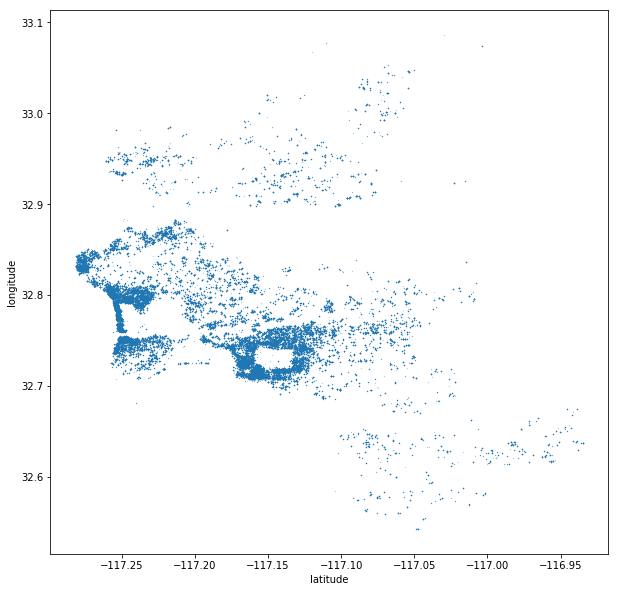

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(df['longitude'], df['latitude'], s=0.02)
#plt.plot(-117.242488,32.664313, 'ro')
#plt.plot(-117.190783,32.732586, 'ro')


axes = plt.gca()
axes.set_xlabel('latitude')
axes.set_ylabel('longitude')

We found an API for live mapping called ArcGIS which handles geospatial data analysis. A lot of the heavy data handling requires another module from ArcGIS called arcpy but that costs money. We'll try to to the best we can with this

In [2]:
#found this on arcpy tutorials
mygis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

NameError: name 'GIS' is not defined

This alters the window of the display for a better view of the data area we want to look at.

For some reason this has to be run after the map has been displayed otherwise the window will not be altered.

In [278]:
m.center = [32.76,-117.15]
m.zoom=12

This displays a map of San Diego.

In [1]:
m = mygis.map('San Diego')
display(m)

NameError: name 'mygis' is not defined

In [280]:
m.center = [32.76,-117.15]
m.zoom=12

### Import Data from df (processing for map)
Arcgis has the map and on the map we can apply layers. This is similar to Photoshop layers in which we can turn them on and off/add and subtract different layers. We can import data from our dataframes for now using the gis.content.import method. One problem is that you can only import 1000 feature points into a layer at a time and a layer can only hold up to approximately 10000 features.

Because of this, we can either cluster data first, or we can import multiple layers. We will do the latter. Below we are creating a list of layers each containing 1000 data points of longitude latitude coordinates.

In [168]:
#import collections in sizes of 1000
coords = df[['latitude','longitude']]
def make_ftcols(df):
    temp_list = []
    i = 0
    while i < len(df):
        temp_list.append(mygis.content.import_data(df[i:i+1000]))
        i += 1000
        print("imported",i,"of",len(coords))

    print("imported", len(coords),"of",len(coords),"rows")
    return temp_list


temp_list = make_ftcols(df)

imported 1000 of 113402
imported 2000 of 113402
imported 3000 of 113402
imported 4000 of 113402
imported 5000 of 113402
imported 6000 of 113402
imported 7000 of 113402
imported 8000 of 113402
imported 9000 of 113402
imported 10000 of 113402
imported 11000 of 113402
imported 12000 of 113402
imported 13000 of 113402
imported 14000 of 113402
imported 15000 of 113402
imported 16000 of 113402
imported 17000 of 113402
imported 18000 of 113402
imported 19000 of 113402
imported 20000 of 113402
imported 21000 of 113402
imported 22000 of 113402
imported 23000 of 113402
imported 24000 of 113402
imported 25000 of 113402
imported 26000 of 113402
imported 27000 of 113402
imported 28000 of 113402
imported 29000 of 113402
imported 30000 of 113402
imported 31000 of 113402
imported 32000 of 113402
imported 33000 of 113402
imported 34000 of 113402
imported 35000 of 113402
imported 36000 of 113402
imported 37000 of 113402
imported 38000 of 113402
imported 39000 of 113402
imported 40000 of 113402
imported 

Since layers can each hold up to 10000 features and we have layers of 1000 features, we will begin merging the layers into a lesser amount of larger layers. We will combine 8 layers at a time, both to lower the amount of total layers, but we do not want to do 10 layers at a time since we want to avoid the possibility of a case where we accidently go over the limit due to extraneous factors(ex. 8 layers with 1000 features becomes 1 layer with 8000 features)

In [189]:
def merge_ftcols(ftlist):
    temp_ft_col = ftlist[0]
    merge_count = 0;
    for i in ftlist[1:]:
        merge_count += 1
        temp_ft_col = merge_layers(temp_ft_col,i,gis=mygis)
        print("merged",merge_count,"list(s)")
    return temp_ft_col

In [190]:
# each ft_collection can only hold up to about 10,000 values, we merge in collections of 8
ind=0
ft_cols_list = []
while ind < len(temp_list):
    print(int(1 + ind/8),"collections of",int(len(temp_list)/8),"made")
    ft_cols_list.append(merge_ftcols(temp_list[ind:ind+8]))
    ind+=8

0 collections of 14 made
merged 1 list(s)
merged 2 list(s)
merged 3 list(s)
merged 4 list(s)
merged 5 list(s)
merged 6 list(s)
merged 7 list(s)
1 collections of 14 made
merged 1 list(s)
merged 2 list(s)
merged 3 list(s)
merged 4 list(s)
merged 5 list(s)
merged 6 list(s)
merged 7 list(s)
2 collections of 14 made
merged 1 list(s)
merged 2 list(s)
merged 3 list(s)
merged 4 list(s)
merged 5 list(s)
merged 6 list(s)
merged 7 list(s)
3 collections of 14 made
merged 1 list(s)
merged 2 list(s)
merged 3 list(s)
merged 4 list(s)
merged 5 list(s)
merged 6 list(s)
merged 7 list(s)
4 collections of 14 made
merged 1 list(s)
merged 2 list(s)
merged 3 list(s)
merged 4 list(s)
merged 5 list(s)
merged 6 list(s)
merged 7 list(s)
5 collections of 14 made
merged 1 list(s)
merged 2 list(s)
merged 3 list(s)
merged 4 list(s)
merged 5 list(s)
merged 6 list(s)
merged 7 list(s)
6 collections of 14 made
merged 1 list(s)
merged 2 list(s)
merged 3 list(s)
merged 4 list(s)
merged 5 list(s)
merged 6 list(s)
merged 7 

### Make Density Maps of Each Point Layer
With each layer of 10000, we can create a density map (density raster layer) based on the density of points. Areas with more points will have a darker shade while areas with less points will have heavier shading. The method calculate_density(i) returns a density raster layer that does this. 

Below we get a density raster layer for each of the point layers we created above. We then merge all the raster layers to create one accumulated density map that measures the entirety of the coordinate distribution of all the Airbnbs in our database.

In [192]:
density_map_list = []
for i in ft_cols_list:
    density_map_list.append(calculate_density(i))

In [193]:
#merge all the density maps into one layer and add it to the map
temp_dens_map = density_map_list[0]
for i in density_map_list[1:]:
    merge_layers(temp_dens_map,i)


In [274]:
m=mygis.map('San Diego')
display(m)

In [275]:
#alters the window of the display for a better view of the data area we want to look at.
#NOTE some reason this has to be run after the map has been displayed otherwise the window will not be altered
m.add_layer(temp_dens_map)
m.center = [32.76,-117.15]
m.zoom=12

In [276]:
#some reason you need to run this twice in separate cells to get to the correct position
m.center = [32.76,-117.15]
m.zoom=12

### Mapping the Points

This draws all the points, also laggy but only on resizing/moving/drawing. Arcgis has a draw function that will also draw points, but the difference between this and the method described directly above is that this draw function reduces the capabilities of the feature we are drawing. 

There is less interactibility but also less lag. It still retains the point that it needs to redraw all points if we move the map but it is not as bad. Here we draw a point for every latitude, longitude combination, and give it a color based on its overall satisfaction or its price. Yellow is higher value while Red is lower value.

In [269]:
# takes in a dataframe of 3 columns
# first is latitude, second is longitude
# third is a column of measure between 0 and 5

def draw_points_on_map(df,m):
    for lat,lon,val in df.values:
        color_value=[255,int(4+50*val),0,255]
        m.draw({'x':lon,'y':lat}, symbol={"color": color_value, "size": m.zoom/8, "type": "esriSMS", "style": "esriSMSCircle"})


In [257]:
n = mygis.map('San Diego')
display(n)

In [259]:
#recenter the window
#NOTE only do this after the map is drawn
n.center = [32.76,-117.15]
n.zoom=12

In [260]:
n.center = [32.76,-117.15]
n.zoom=12

In [261]:
draw_points_on_map(df[['latitude','longitude','overall_satisfaction']],n)

### Mapping prices

Here we want to scale the prices so we can avoid clustering of lower level prices compared to the few very high prices.

In [270]:
n = mygis.map('San Diego')
display(n)

In [271]:
n.center = [32.76,-117.15]
n.zoom=12

In [272]:
n.center = [32.76,-117.15]
n.zoom=12

In [258]:
#this also fits the measurement of prices to be between 0 and 5 so we can use it to draw points with
df['log_price']=np.log10(df['price'])

In [273]:
draw_points_on_map(df[['latitude','longitude','log_price']],n)

### Visualization of satisfaction with respect to time
So we currently have dataframes for each year. We use the df.value_counts method to see how many of each rating(0-5) we have. We give it the option normalize=True to normalize the data, meaning we make them proportions relative to full size and not their counts.

In [21]:
df_sat_counts = pd.DataFrame(index=np.arange(0.0,5.1,0.5),columns=['2014','2015','2016','2017'])
df_sat_counts['2014']=df_2014['overall_satisfaction'].value_counts(normalize=True,dropna=True)
df_sat_counts['2015']=df_2015['overall_satisfaction'].value_counts(normalize=True,dropna=True)
df_sat_counts['2016']=df_2016['overall_satisfaction'].value_counts(normalize=True,dropna=True)
df_sat_counts['2017']=df_2017['overall_satisfaction'].value_counts(normalize=True,dropna=True)

df_sat_counts.T.fillna(0)

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
2014,0.000000,0.0,0.000344,0.000000,0.000689,0.000689,0.007923,0.005167,0.053738,0.289011,0.642439
2015,0.000000,0.0,0.001478,0.000000,0.001989,0.001023,0.009093,0.008354,0.070641,0.296261,0.611162
2016,0.029201,0.0,0.000285,0.000061,0.000813,0.001220,0.005572,0.008012,0.050492,0.297340,0.607003
2017,0.224563,0.0,0.000000,0.000046,0.000160,0.000297,0.001601,0.006358,0.031241,0.232773,0.502962


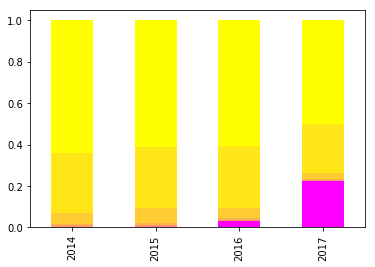

In [22]:
counts_plot = df_sat_counts.T.plot(kind='bar', stacked=True, colormap='spring',legend=False)


Here we are doing the same thing as above except we are going to look closer at the data and categorize them by months.

In [23]:
# doing similar thing but for months
df_months = pd.DataFrame(index=np.arange(0.0,5.1,0.5))
for i,d in enumerate(list_total):
    for j,e in enumerate(d):
        #e = e[e.reviews > 5]
        
        label = str(i) + str(j);
        df_months[str(31*i+j)] = e['overall_satisfaction'].value_counts(normalize=True,dropna=True)
df_months.columns = ['may_2014','november_2014','august_2015','october1_2015','october2_2015','december1_2015','december2_2015','january_2016','february_2016','march_2016','april_2016','may_2016','june_2016','july_2016','august_2016','september_2016','october_2016','november_2016','december_2016','january_2017','february_2017','april_2017','may_2017','june_2017','july_2017']

In [24]:
#replace all NaNs with 0s
df_months = df_months.fillna(0)
df_months

,may_2014,november_2014,august_2015,october1_2015,october2_2015,december1_2015,december2_2015,january_2016,february_2016,march_2016,...,september_2016,october_2016,november_2016,december_2016,january_2017,february_2017,april_2017,may_2017,june_2017,july_2017
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.239293,0.237302,0.236093,0.221129,0.213340,0.215315,0.213699
0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,0.000000,0.000563,0.001612,0.001325,0.001584,0.001243,0.001543,0.001180,0.000873,0.000848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000295,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000167,0.000165,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.001126,0.002015,0.002650,0.001901,0.001243,0.002160,0.002950,0.002910,0.002826,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000166,0.000164,0.000323,0.000310,0.000147
2.5,0.000000,0.001126,0.000806,0.000994,0.000950,0.001243,0.001235,0.001770,0.002037,0.001978,...,0.000486,0.000235,0.000447,0.000500,0.000330,0.000331,0.000492,0.000323,0.000155,0.000147
3.0,0.002662,0.011261,0.009674,0.007618,0.009186,0.008390,0.010185,0.012389,0.011350,0.009607,...,0.003642,0.003994,0.002685,0.002333,0.002144,0.001987,0.001476,0.001292,0.001240,0.001027
3.5,0.007098,0.003941,0.007255,0.008281,0.008869,0.009323,0.008642,0.007080,0.006694,0.006782,...,0.009954,0.009398,0.008054,0.007499,0.006926,0.006623,0.007218,0.006621,0.004960,0.005427
4.0,0.027507,0.070383,0.076179,0.069559,0.072220,0.067122,0.065123,0.071091,0.070140,0.070641,...,0.043457,0.044173,0.046085,0.034661,0.034631,0.035099,0.031168,0.030039,0.027283,0.026694
4.5,0.280390,0.294482,0.291012,0.298774,0.296801,0.298322,0.299383,0.283481,0.281432,0.278327,...,0.315611,0.306156,0.307830,0.234461,0.240270,0.237748,0.231463,0.228682,0.224926,0.227339


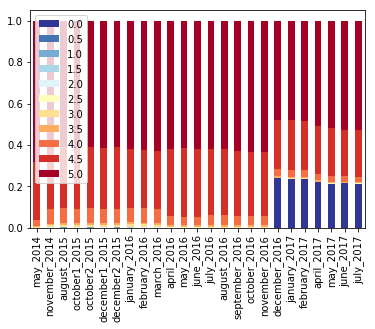

In [25]:
months_sat_plot = df_months.T.plot(kind='bar', stacked=True, colormap='RdYlBu_r',legend=True)


Notice that the amount of 0.0 values for overall satisfaction largely increases after december 2016. However, when we filter the data by removing values with reviews less than 5, this drastically changes. Notice how values after december 2016 are farm more normal. Below we repeat the process from above but with a filtering on the data.

,may_2014,november_2014,august_2015,october1_2015,october2_2015,december1_2015,december2_2015,january_2016,february_2016,march_2016,...,september_2016,october_2016,november_2016,december_2016,january_2017,february_2017,april_2017,may_2017,june_2017,july_2017
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000000
2.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000470,0.000460,0.000445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.001592,0.000000,0.003262,0.003181,0.003035,0.002447,0.002901,0.003758,0.003218,0.002668,...,0.001165,0.001677,0.001328,0.001819,0.001545,0.001292,0.000493,0.000482,0.000691,0.000650
3.5,0.000000,0.001965,0.003914,0.004242,0.004047,0.003426,0.002418,0.002818,0.001839,0.004002,...,0.005535,0.005032,0.003719,0.004678,0.004892,0.005169,0.005172,0.004820,0.004147,0.003469
4.0,0.006369,0.041257,0.046314,0.039236,0.040465,0.037200,0.036750,0.036167,0.037701,0.037795,...,0.038742,0.038859,0.040117,0.040281,0.040165,0.038770,0.035714,0.032779,0.029263,0.029055
4.5,0.292994,0.361493,0.352903,0.352068,0.349519,0.356828,0.356867,0.337248,0.333333,0.328146,...,0.312263,0.303327,0.308714,0.307173,0.315139,0.312225,0.297783,0.293806,0.286866,0.291414


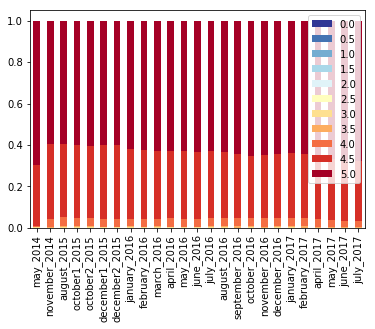

In [26]:
#doing similar thing but for months with filtered reviews lower than 5
df_months_low_rev = pd.DataFrame(index=np.arange(0.0,5.1,0.5))
for i,d in enumerate(list_total):
    for j,e in enumerate(d):
        label = str(i) + str(j);
        e = e[e.reviews >= 5]
        
        #unique the column names
        df_months_low_rev[str(31*i+j)] = e['overall_satisfaction'].value_counts(normalize=True,dropna=True)


df_months_low_rev.columns = ['may_2014','november_2014','august_2015','october1_2015','october2_2015','december1_2015','december2_2015','january_2016','february_2016','march_2016','april_2016','may_2016','june_2016','july_2016','august_2016','september_2016','october_2016','november_2016','december_2016','january_2017','february_2017','april_2017','may_2017','june_2017','july_2017']

display(df_months_low_rev.fillna(0))

months_sat_plot_low_rev = df_months_low_rev.T.plot(kind='bar', stacked=True, colormap='RdYlBu_r',legend=True)


## Identifying relationship with price and time
Here we want to look at the actual comparison of time with the relationship of price and overall satisfaction. Hence we want to be able to quantify a price with a time as well as an overall satisfaction with a time. As we saw with the year example, it was not as accurate so we will do this by months. While this relationship is not entirely accurate since not all months are present yet we have all the months sequentially set(e.g may 2014 and nov 2014 are 0 and 1 respectively on the chart), we are fine with this because our months are not heavily clustered and we want to look at the relative relationships between months.

Here we are taking the mean value of satisfaction and price respectively and adding them to a list

In [34]:
sats_high = []
for i,d in enumerate(list_total):
    for j,e in enumerate(d):
        label = str(i) + str(j);
        e = e[e.reviews > 5]
        
        #unique the column names
        sats_high.append(e['overall_satisfaction'].mean())



In [35]:
prices_high = []
for i,d in enumerate(list_total):
    for j,e in enumerate(d):
        label = str(i) + str(j);
        e = e[e.reviews > 5]
        
        #unique the column names
        prices_high.append(e['price'].mean())



### plot comparing the prices and satisfaction levels
this is only for data points with more than 5 reviews.

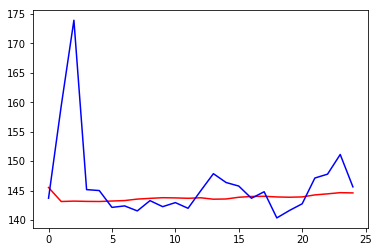

In [36]:
mult_sats_high = [30*x for x in sats_high]

plt.plot(range(25),mult_sats,'r')
plt.plot(range(25),prices_high,'b')

In [56]:
differences = []
for i in range(25):
    differences.append((i,mult_sats_high[i] - prices_high[i]))

In [57]:
df_diff = pd.DataFrame(differences,columns=['time','difference'])


In [58]:
df_diff.corr()

,time,difference
time,1.000000,0.278843
difference,0.278843,1.000000


In [79]:
outcome,predictors = patsy.dmatrices('difference ~ time',df_diff)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.939
Date:                Sun, 18 Mar 2018   Prob (F-statistic):              0.177
Time:                        01:45:28   Log-Likelihood:                -82.900
No. Observations:                  25   AIC:                             169.8
Df Residuals:                      23   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5381      2.699     -2.052      0.0

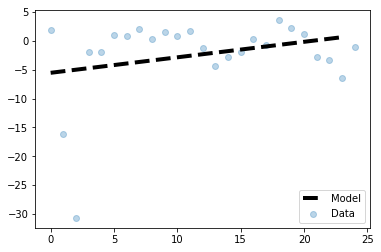

In [63]:
plt.scatter(df_diff['time'],df_diff['difference'],alpha=0.3,label='Data')
xs = np.arange(df_diff['time'].min(),df_diff['time'].max())
ys = 0.2684 *xs - 5.5381
plt.plot(xs,ys,'--k',linewidth=4,label='Model')

plt.legend()

### Same thing but for datapoints with less than 5 reviews
need to decide if we want to use this stuff or not

In [74]:
sats_low = []
for i,d in enumerate(list_total):
    for j,e in enumerate(d):
        label = str(i) + str(j);
        e = e[e.reviews <= 5]
        
        #unique the column names
        sats_low.append(e['overall_satisfaction'].mean())

In [75]:
prices_low = []
for i,d in enumerate(list_total):
    for j,e in enumerate(d):
        label = str(i) + str(j);
        e = e[e.reviews <= 5]
        
        #unique the column names
        prices_low.append(e['price'].mean())



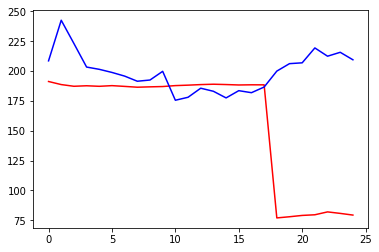

In [76]:
mult_sats_low = [40*x for x in sats_low]

plt.plot(range(25),mult_sats_low,'r')
plt.plot(range(25),prices_low,'b')

From here we see a big dip in values between 20 and 25. We anticipate separate clusters and will separate the sets

### Separation into Clusters

In [90]:
differences = []
for i in range(18):
    differences.append((i,mult_sats_low[i] - prices_low[i]))
differences2 = []
for i in range(18,25):
    differences2.append((i,mult_sats_low[i] - prices_low[i]))

In [91]:
df_diff = pd.DataFrame(differences,columns=['time','difference'])
df_diff2 = pd.DataFrame(differences2,columns=['time','difference'])


#### For the first cluster

In [92]:
outcome,predictors = patsy.dmatrices('difference ~ time',df_diff)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           7.77e-05
Time:                        02:01:51   Log-Likelihood:                -67.121
No. Observations:                  18   AIC:                             138.2
Df Residuals:                      16   BIC:                             140.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.6127      4.834     -5.919      0.0

C:\Users\kukidex\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [93]:
outcome,predictors = patsy.dmatrices('difference ~ time',df_diff2)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     1.991
Date:                Sun, 18 Mar 2018   Prob (F-statistic):              0.217
Time:                        02:01:54   Log-Likelihood:                -20.011
No. Observations:                   7   AIC:                             44.02
Df Residuals:                       5   BIC:                             43.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -102.6550     19.905     -5.157      0.0

C:\Users\kukidex\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


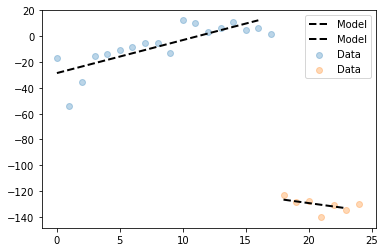

In [98]:
plt.scatter(df_diff['time'],df_diff['difference'],alpha=0.3,label='Data')
xs = np.arange(df_diff['time'].min(),df_diff['time'].max())
ys = 2.5537 *xs -28.6127
plt.plot(xs,ys,'--k',linewidth=2,label='Model')

plt.scatter(df_diff2['time'],df_diff2['difference'],alpha=0.3,label='Data')
xs2 = np.arange(df_diff2['time'].min(),df_diff2['time'].max())
ys2 = -1.3314 *xs2 -102.6550
plt.plot(xs2,ys2,'--k',linewidth=2,label='Model')

plt.legend()